In [1]:
import pandas as pd
import numpy as np
data = [{'name':'Anastasia', 'score':12.5}, {'name':'Dima','score':9}, {'name':'Katherine','score':16.5}]
df_new = pd.DataFrame(data = data)
print(df_new)

for index, row in df_new.iterrows():
    print(row['name'], row['score'])

        name  score
0  Anastasia   12.5
1       Dima    9.0
2  Katherine   16.5
Anastasia 12.5
Dima 9.0
Katherine 16.5


In [2]:
l1 = list(df_new.columns.values)
l1

['name', 'score']

In [38]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}, index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

# print(df[df['attempts'] > 2])
print(len(df.axes[1])) # df.axes represents two dimensions of the dataframe
print(len(df.columns))
# df  = df.rename(index = {'d': '11.5'}, inplace = False)
df.loc['d', 'score'] = 11.5

print(df[df['score'].isnull()][['attempts', 'name', 'qualify', 'score']]) 
# print(df.sort_values(by = ['name', 'score'], ascending = [False, True]))
# df['qualify'] = np.where(df['qualify'] == 'yes', 'True', 'False')
# df['qualify'] = df['qualify'].map({'yes': True, 'no' : False})
# print(df)
df

4
4
   attempts   name qualify  score
h         1  Laura      no    NaN


,name,score,attempts,qualify
a,Anastasia,12.5,1,yes
b,Dima,9.0,3,no
c,Katherine,16.5,2,yes
d,James,11.5,3,no
e,Emily,9.0,2,no
f,Michael,20.0,3,yes
g,Matthew,14.5,1,yes
h,Laura,NaN,1,no
i,Kevin,8.0,2,no
j,Jonas,19.0,1,yes


In [39]:
df['new'] = df['qualify'].apply(lambda x: 'True' if x == 'yes' else 'False')

In [40]:
df

,name,score,attempts,qualify,new
a,Anastasia,12.5,1,yes,True
b,Dima,9.0,3,no,False
c,Katherine,16.5,2,yes,True
d,James,11.5,3,no,False
e,Emily,9.0,2,no,False
f,Michael,20.0,3,yes,True
g,Matthew,14.5,1,yes,True
h,Laura,NaN,1,no,False
i,Kevin,8.0,2,no,False
j,Jonas,19.0,1,yes,True


In [36]:
df.dropna(axis = 1, thresh = 10) #stil, it doesn't modify the df inplace, adding a thresh to drop rows with more nans

,name,attempts,qualify
a,Anastasia,1,yes
b,Dima,3,no
c,Katherine,2,yes
d,James,3,no
e,Emily,2,no
f,Michael,3,yes
g,Matthew,1,yes
h,Laura,1,no
i,Kevin,2,no
j,Jonas,1,yes


In [16]:
exam_data = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data = exam_data, index = labels)

print(list(df.columns.values))


['name', 'score', 'attempts', 'qualify']


In [4]:
df.rename(columns = {'name':'11','score': '22','attempts': '33','qualify': '44'})
# the rename method of pandas, specify index or columns, pass a dict to it

,11,22,33,44
a,Anastasia,12.5,1,yes
b,Dima,9.0,3,no
c,Katherine,16.5,2,yes
d,James,NaN,3,no
e,Emily,9.0,2,no
f,Michael,20.0,3,yes
g,Matthew,14.5,1,yes
h,Laura,NaN,1,no
i,Kevin,8.0,2,no
j,Jonas,19.0,1,yes


In [41]:
df = df[['score', 'attempts', 'qualify', 'name']]
df

,score,attempts,qualify,name
a,12.5,1,yes,Anastasia
b,9.0,3,no,Dima
c,16.5,2,yes,Katherine
d,11.5,3,no,James
e,9.0,2,no,Emily
f,20.0,3,yes,Michael
g,14.5,1,yes,Matthew
h,NaN,1,no,Laura
i,8.0,2,no,Kevin
j,19.0,1,yes,Jonas


In [42]:
df.groupby('qualify').mean()['score']

qualify
no      9.375
yes    16.500
Name: score, dtype: float64

In [62]:
df[['score','attempts']].apply(np.mean, axis =0)

score       13.5625
attempts     1.9000
dtype: float64

In [6]:
# how to insert a new row
df = df.append({'score': 8.0, 'attempts' : 1, "qualify" : 'no', 'name' : 'Doug'}, ignore_index = True)


In [7]:
df.to_csv('new_file.csv', sep = '\t', index = False)


In [8]:
pd.read_csv('new_file.csv')

,score\tattempts\tqualify\tname
0,12.5\t1\tyes\tAnastasia
1,9.0\t3\tno\tDima
2,16.5\t2\tyes\tKatherine
3,\t3\tno\tJames
4,9.0\t2\tno\tEmily
5,20.0\t3\tyes\tMichael
6,14.5\t1\tyes\tMatthew
7,\t1\tno\tLaura
8,8.0\t2\tno\tKevin
9,19.0\t1\tyes\tJonas


In [9]:
df_sub = df[df['attempts'] == 2]
df_sub

,score,attempts,qualify,name
2,16.5,2,yes,Katherine
4,9.0,2,no,Emily
8,8.0,2,no,Kevin


In [63]:
df_c = pd.DataFrame({'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
'city': ['California', 'Los Angeles', 'California', 'California', 'California', 'Los Angeles', 'Los Angeles', 'Georgia', 'Georgia', 'Los Angeles']})

In [66]:
grouped = df_c.groupby('city')
df_1 = grouped.count().rename(columns = {'name' : 'number_people'})
df_1

,number_people
city,
California,4
Georgia,2
Los Angeles,4


In [17]:
df_1.drop('Georgia', axis=0)

,number_people
city,
California,4
Los Angeles,4


In [20]:
df_1.loc['Georgia'] = {'number_people': 2}

In [38]:
for ind, row in df_1.iterrows():
    print(ind)
    print(row['number_people'])
    if int(row['number_people']) == 4:
        df_1 = df_1.drop(ind, axis = 0)

California
4
Georgia
2
Los Angeles
4


In [39]:
df_1

,number_people
city,
Georgia,2


In [31]:
df_2 = df_1[df_1.number_people != 2]
df_2

,number_people
city,
California,4
Los Angeles,4


In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [41]:
df.isnull().sum() #df.isnull() itself generates a dataframe 

name        0
score       2
attempts    0
qualify     0
dtype: int64

In [42]:
df.fillna(0)

,name,score,attempts,qualify
a,Anastasia,12.5,1,True
b,Dima,9.0,3,False
c,Katherine,16.5,2,True
d,James,0.0,3,False
e,Emily,9.0,2,False
f,Michael,20.0,3,True
g,Matthew,14.5,1,True
h,Laura,0.0,1,False
i,Kevin,8.0,2,False
j,Jonas,19.0,1,True


In [75]:
df.reset_index(level = 0, inplace = True)


In [76]:
print(df)

  index       name  score  attempts  qualify
0     a  Anastasia   12.5         1     True
1     b       Dima    9.0         3    False
2     c  Katherine   16.5         2     True
3     d      James    NaN         3    False
4     e      Emily    9.0         2    False
5     f    Michael   20.0         3     True
6     g    Matthew   14.5         1     True
7     h      Laura    NaN         1    False
8     i      Kevin    8.0         2    False
9     j      Jonas   19.0         1     True


In [43]:
df_n = pd.DataFrame(data =np.random.rand(10,2))

In [44]:
df_n

,0,1
0,0.281723,0.311874
1,0.007236,0.896528
2,0.583934,0.720151
3,0.016099,0.029502
4,0.038296,0.360877
5,0.466384,0.896052
6,0.394514,0.944053
7,0.820495,0.154558
8,0.145287,0.466831
9,0.311861,0.494056


In [47]:
part_1 = df_n.sample(frac = 0.7, random_state = 7)
part_2 = df_n.drop(part_1)

In [48]:
part_2

,0,1
2,0.583934,0.720151
3,0.016099,0.029502
4,0.038296,0.360877
5,0.466384,0.896052
6,0.394514,0.944053
7,0.820495,0.154558
8,0.145287,0.466831
9,0.311861,0.494056


In [18]:
import pandas as pd
import numpy as np
data = [('s3','$5','57'), ('e2',4,6),(5,'3@','u9')]
tar = pd.DataFrame(data, columns = ['A','B','C'])

In [89]:
df

,0
0,2000-03-11
1,2000-03-12
2,2000-03-13


In [2]:
data = [(2,3,4), (6,7,4), (3,5, 8)]
tar = pd.DataFrame(data, columns = ['A','B','C'])
tar

,A,B,C
0,2,3,4
1,6,7,4
2,3,5,8


In [4]:
tar.apply(lambda x: print(x.argmax()), axis = 0) # find the max's value's index

1
1
2


A    None
B    None
C    None
dtype: object

In [ ]:
# pick up from 46

In [4]:
df_1 = df.apply(lambda x: np.square(x) if x.name in ['A', 'B'] else x)

In [5]:
df_1

,A,B,C
0,9,25,7
1,4,16,6
2,25,64,9


In [85]:
df_1.B.tolist()

[25, 16, 64]

## Datetime

In [80]:
df = pd.DataFrame(data = ['3/11/2000', '3/12/2000', '3/13/2000'])

In [82]:
df[0] = pd.to_datetime(df[0])

In [83]:
df

,0
0,2000-03-11
1,2000-03-12
2,2000-03-13


## Concatnate, Join and Merge prac

In [61]:
student_data1 = pd.DataFrame({
        'student_id': ['S1', 'S2', 'S3', 'S4', 'S5'],
         'name': ['Danniella Fenton', 'Ryder Storey', 'Bryce Jensen', 'Ed Bernal', 'Kwame Morin'], 
        'marks': [200, 210, 190, 222, 199]})

student_data2 = pd.DataFrame({
        'student_id': ['S4', 'S5', 'S6', 'S7', 'S8'],
        'name': ['Scarlette Fisher', 'Carla Williamson', 'Dante Morse', 'Kaiser William', 'Madeeha Preston'], 
        'marks': [201, 200, 198, 219, 201]})

In [63]:
# Horizontally
new = pd.concat([student_data1, student_data2], axis  = 0)
new

,student_id,name,marks
0,S1,Danniella Fenton,200
1,S2,Ryder Storey,210
2,S3,Bryce Jensen,190
3,S4,Ed Bernal,222
4,S5,Kwame Morin,199
0,S4,Scarlette Fisher,201
1,S5,Carla Williamson,200
2,S6,Dante Morse,198
3,S7,Kaiser William,219
4,S8,Madeeha Preston,201


In [70]:
# There can be many dictionaries within this list, each representing one row
new.append([{'student_id': 'S6', 'name': 'Scarlette Fisher', 'marks': 205}], ignore_index=True)

,student_id,name,marks
0,S1,Danniella Fenton,200
1,S2,Ryder Storey,210
2,S3,Bryce Jensen,190
3,S4,Ed Bernal,222
4,S5,Kwame Morin,199
5,S4,Scarlette Fisher,201
6,S5,Carla Williamson,200
7,S6,Dante Morse,198
8,S7,Kaiser William,219
9,S8,Madeeha Preston,201


In [68]:
# or we can create an indexed series for that
s6 = pd.Series(['S6', 'Scarlette Fisher', 205], index=['student_id', 'name', 'marks'])

new.append(s6, ignore_index = True)

,student_id,name,marks
0,S1,Danniella Fenton,200
1,S2,Ryder Storey,210
2,S3,Bryce Jensen,190
3,S4,Ed Bernal,222
4,S5,Kwame Morin,199
5,S4,Scarlette Fisher,201
6,S5,Carla Williamson,200
7,S6,Dante Morse,198
8,S7,Kaiser William,219
9,S8,Madeeha Preston,201


In [71]:
exam_data = pd.DataFrame({
        'student_id': ['S1', 'S2', 'S3', 'S4', 'S5', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13'],
        'exam_id': [23, 45, 12, 67, 21, 55, 33, 14, 56, 83, 88, 12]})

In [72]:
merged_data = pd.merge(new, exam_data, on = 'student_id') # merge performs essentially same function as join does in sql, by specifying how

In [73]:
merged_data

,student_id,name,marks,exam_id
0,S1,Danniella Fenton,200,23
1,S2,Ryder Storey,210,45
2,S3,Bryce Jensen,190,12
3,S4,Ed Bernal,222,67
4,S4,Scarlette Fisher,201,67
5,S5,Kwame Morin,199,21
6,S5,Carla Williamson,200,21
7,S7,Kaiser William,219,55
8,S8,Madeeha Preston,201,33


In [75]:
# get the intersection of two dataframes...

pd.merge(student_data1, student_data2, on = 'student_id', how = 'inner')

,student_id,name_x,marks_x,name_y,marks_y
0,S4,Ed Bernal,222,Scarlette Fisher,201
1,S5,Kwame Morin,199,Carla Williamson,200


In [76]:
pd.merge(student_data1, student_data2, on = 'student_id', how = 'outer')

,student_id,name_x,marks_x,name_y,marks_y
0,S1,Danniella Fenton,200.0,NaN,NaN
1,S2,Ryder Storey,210.0,NaN,NaN
2,S3,Bryce Jensen,190.0,NaN,NaN
3,S4,Ed Bernal,222.0,Scarlette Fisher,201.0
4,S5,Kwame Morin,199.0,Carla Williamson,200.0
5,S6,NaN,NaN,Dante Morse,198.0
6,S7,NaN,NaN,Kaiser William,219.0
7,S8,NaN,NaN,Madeeha Preston,201.0


In [77]:
data1 = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'P': ['P0', 'P1', 'P2', 'P3'],
                     'Q': ['Q0', 'Q1', 'Q2', 'Q3']}) 
data2 = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'R': ['R0', 'R1', 'R2', 'R3'],
                      'S': ['S0', 'S1', 'S2', 'S3']})

In [78]:
pd.merge(data1, data2, on = ['key1', 'key2'], how = 'left')

,key1,key2,P,Q,R,S
0,K0,K0,P0,Q0,R0,S0
1,K0,K1,P1,Q1,NaN,NaN
2,K1,K0,P2,Q2,R1,S1
3,K1,K0,P2,Q2,R2,S2
4,K2,K1,P3,Q3,NaN,NaN


In [79]:
# lets start from 12

## Machine Learning methods under sci learn

In [6]:
from sklearn import datasets

In [7]:
iris = datasets.load_iris()

In [20]:
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [21]:

print(df_iris.shape)
df_iris.head(3)

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


In [22]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [35]:
df_iris.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

<AxesSubplot:>

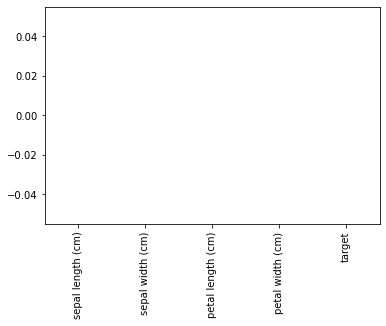

In [33]:
# df_iris.isna().sum().plot(kind = 'bar', x = 'index', y = 'n')

In [36]:
# pick up from 4

In [42]:
import numpy as np
from scipy import sparse
eye = np.eye(4)
print('Numpy Array: \n', eye)
sparse_m = sparse.csr_matrix(eye)
print("Sparse Matrix:\n", sparse_m)

Numpy Array: 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Sparse Matrix:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [55]:
df_iris['target'].describe()

count    150.000000
mean       1.000000
std        0.819232
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: target, dtype: float64

In [56]:
df_iris = pd.read_csv('iris.csv')

In [60]:
df_iris = df_iris.rename(columns = {'class': 'species'})
# 

In [61]:
df_iris['species'] = df_iris['species'].apply(lambda x: x[5:])

In [66]:
# df_iris.groupby(df_iris['species']).count().sepal_length
df_iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [76]:
df_iris = df_iris.reset_index().rename(columns = {'index': 'Id'})

In [79]:
df_iris = df_iris.drop('level_0', axis = 1)

In [88]:
df_iris.iloc[:, 0:3]
# .values

,Id,sepal_length,sepal_width
0,0,5.1,3.5
1,1,4.9,3.0
2,2,4.7,3.2
3,3,4.6,3.1
4,4,5.0,3.6
...,...,...,...
145,145,6.7,3.0
146,146,6.3,2.5
147,147,6.5,3.0
148,148,6.2,3.4


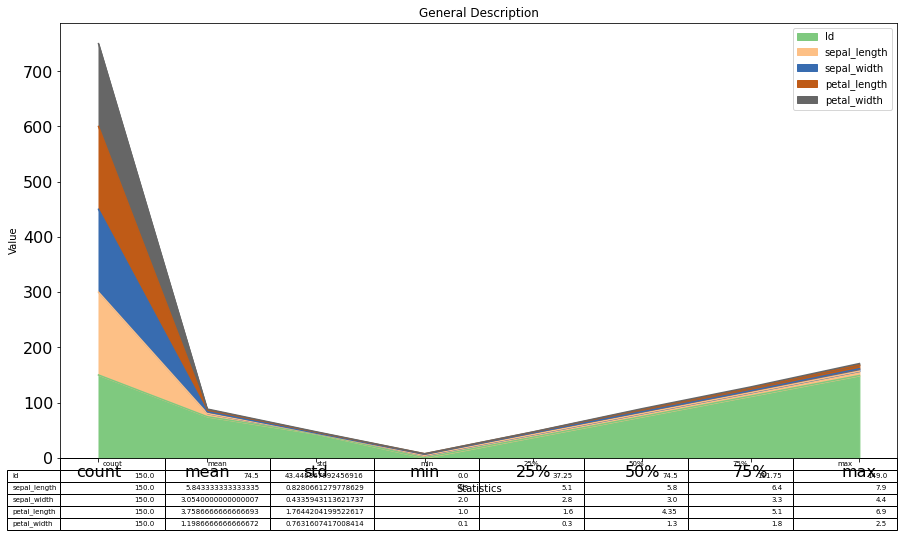

In [102]:
df_iris.describe().plot(kind = 'area', fontsize = 16, figsize = (15, 8), table = True, colormap = 'Accent')
import matplotlib.pyplot as plt
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Description")
plt.show()

C:\Users\10535\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


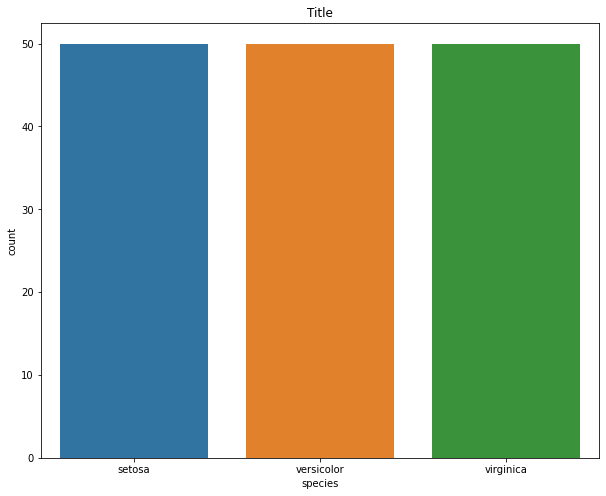

In [109]:
import seaborn as sns # some thoughts regarding matplotlib.pyp and seaborn?
ax = plt.subplots(1,1, figsize = (10, 8))
sns.countplot('species', data = df_iris)
plt.title('Title')
plt.show()

In [114]:
grouped = df_iris.groupby(df_iris.species)
d = grouped.size()

In [115]:
d

species
setosa        50
versicolor    50
virginica     50
dtype: int64

([<matplotlib.patches.Wedge at 0x1663228cdc0>,
 [Text(0.5499999702695115, 0.9526279613277875, ''),
  Text(-1.0999999999999954, -1.0298943258065002e-07, ''),
  Text(0.5500001486524352, -0.9526278583383436, '')])

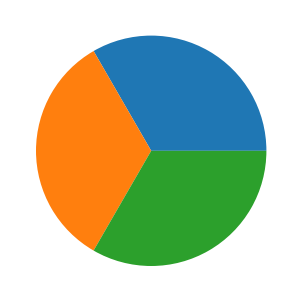

In [132]:
# oop way of doing this...
fig = plt.figure()
ax = fig.add_axes([0.1,0.1, 1,1])
ax.pie(d)

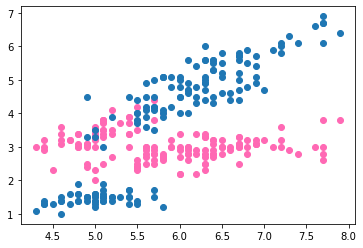

In [140]:
# find the relationship between sepal_length and sepal_width
# scatter plot maybe?
fig, ax = plt.subplots()
ax.scatter(df_iris.sepal_length, df_iris.sepal_width, c = 'hotpink')
ax.scatter(df_iris.sepal_length, df_iris.petal_length)
plt.show()


In [144]:
df = df_iris

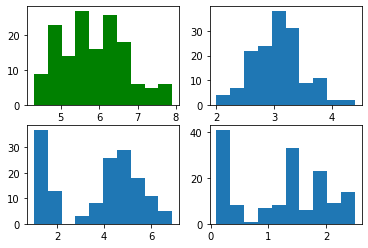

In [146]:
fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(nrows = 2,ncols = 2)
ax1.hist(df.sepal_length, color = 'green')
ax2.hist(df.sepal_width)
ax3.hist(df.petal_length)
ax4.hist(df.petal_width)
plt.show()

In [ ]:
# go to the models next time